# Vector Applications

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time

## k-Means Clustering

## Exercises

### Exercise 1

In [19]:
def corrAndCosine(x, y):
    # compute cosine similarity
    num = np.dot(x, y)
    den = np.linalg.norm(x) * np.linalg.norm(y)  # magnitudes
    cos = num / den

    # compute correlation
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    num = np.dot(xm, ym)
    den = np.linalg.norm(xm) * np.linalg.norm(ym)
    cor = num / den

    return cor, cos


a = np.random.randn(15)
b = np.random.randn(15)

r, c = corrAndCosine(a, b)
print(r)
print(c)

print(r, np.corrcoef(a, b)[0, 1])

a = np.random.randn(15) + 10  # note the offset!
b = np.random.randn(15)

aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print(np.round(corrAndCosine(a, b), 4))
print(' ')

print('With mean-centering (should be the same):')
print(np.round(corrAndCosine(aNoMean, bNoMean), 4))

-0.23125024863607022
-0.23908437390604495
-0.23125024863607022 -0.2312502486360702
Without mean-centering (should differ):
[-0.0821  0.1858]
 
With mean-centering (should be the same):
[-0.0821 -0.0821]


### Exercise 2

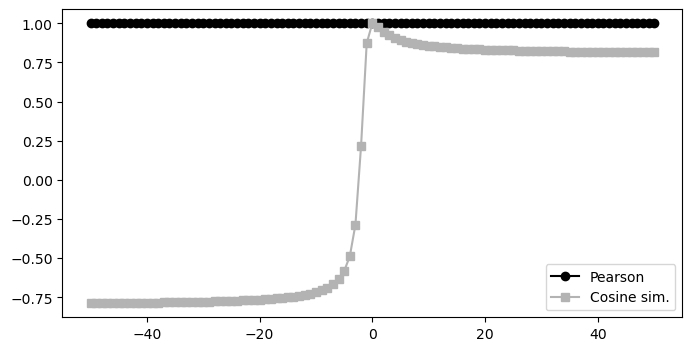

In [31]:
a = np.arange(4, dtype=float)
offsets = np.arange(-50, 51)

results = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
    results[i, :] = corrAndCosine(a, a + offsets[i])

plt.figure(figsize=(8, 4))
h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7, .7, .7])
h[1].set_marker('s')

plt.legend(['Pearson', 'Cosine sim.'])
plt.show()

### Exercise 3

In [32]:
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

### Exercise 4

In [39]:
def corr(x, y):
    # compute correlation
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    num = np.dot(xm, ym)
    den = np.linalg.norm(xm) * np.linalg.norm(ym)
    cor = num / den

    return cor


now = time.time()
for i in range(1000):
    a = np.random.randn(500)
    b = np.random.randn(500)

    cor = corr(a, b)

print(time.time() - now)

now = time.time()
for i in range(1000):
    a = np.random.randn(500)
    b = np.random.randn(500)

    cor = np.corrcoef(a, b)

print(time.time() - now)

0.029094934463500977
0.060358285903930664


### Exercise 5

### Exercise 6

### Exercise 7

### Exercise 8

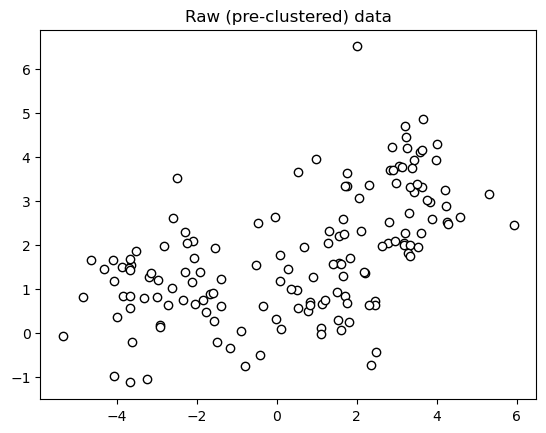

In [58]:
nPerClust = 50

blur = 1

A = [1, 1]
B = [-3, 1]
C = [3, 3]

a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]
c = [C[0] + np.random.randn(nPerClust) * blur, C[1] + np.random.randn(nPerClust) * blur]

data = np.transpose(np.concatenate((a, b, c), axis=1))

plt.plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
plt.title('Raw (pre-clustered) data')
plt.xticks()
plt.yticks()
plt.show()


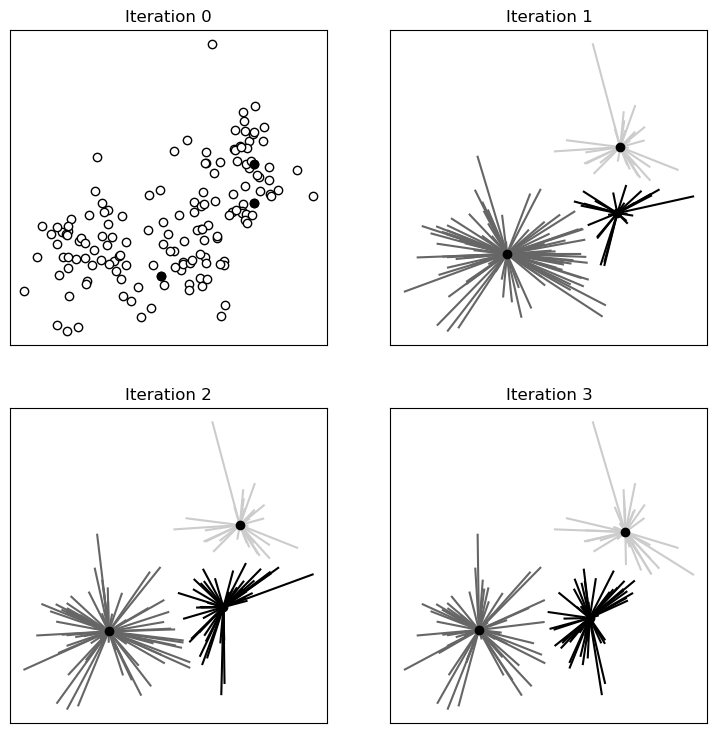

In [88]:
k = 3

ridx = np.random.choice(range(len(data)), k, replace=False)
centroids = data[ridx, :]

fig, axs = plt.subplots(2, 2, figsize=(9, 9))
axs = axs.flatten()
lineColors = [[0, 0, 0], [.4, .4, .4], [.8, .8, .8]]

axs[0].plot(data[:, 0], data[:, 1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:, 0], centroids[:, 1], 'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

for iteri in range(3):
    dists = np.zeros((data.shape[0], k))
    for ci in range(k):
        dists[:, ci] = np.sum((data - centroids[ci, :]) ** 2, axis=1)

    groupidx = np.argmin(dists, axis=1)

    for ki in range(k):
        centroids[ki, :] = [np.mean(data[groupidx == ki, 0]), np.mean(data[groupidx == ki, 1])]

    for i in range(len(data)):
        axs[iteri + 1].plot([data[i, 0], centroids[groupidx[i], 0]], [data[i, 1], centroids[groupidx[i], 1]],
                            color=lineColors[groupidx[i]])

    axs[iteri + 1].plot(centroids[:, 0], centroids[:, 1], 'ko')
    axs[iteri + 1].set_title(f'Iteration {iteri + 1}')
    axs[iteri + 1].set_xticks([])
    axs[iteri + 1].set_yticks([])

plt.show()        
    